In [34]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import pandas as pd
import requests
from utils import TextAccessor
import uuid

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
datasets = Path().cwd().parent/"Datasets"

In [12]:
directories = list(datasets.iterdir())
print(directories[0])

c:\Users\froro\OneDrive\Documentos\mio\Proyectos\comidaCHAT\Datasets\mycolombianrecipes


## My colombian

In [139]:
csv = directories[0].glob("*.csv")
values = pd.concat(map(pd.read_csv, csv))

In [140]:
values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        446 non-null    object
 1   date         446 non-null    object
 2   url          446 non-null    object
 3   ingredients  446 non-null    object
 4   steps        446 non-null    object
dtypes: object(5)
memory usage: 17.5+ KB


In [141]:
my_colombian = values[["title","url", "ingredients", "steps"]]

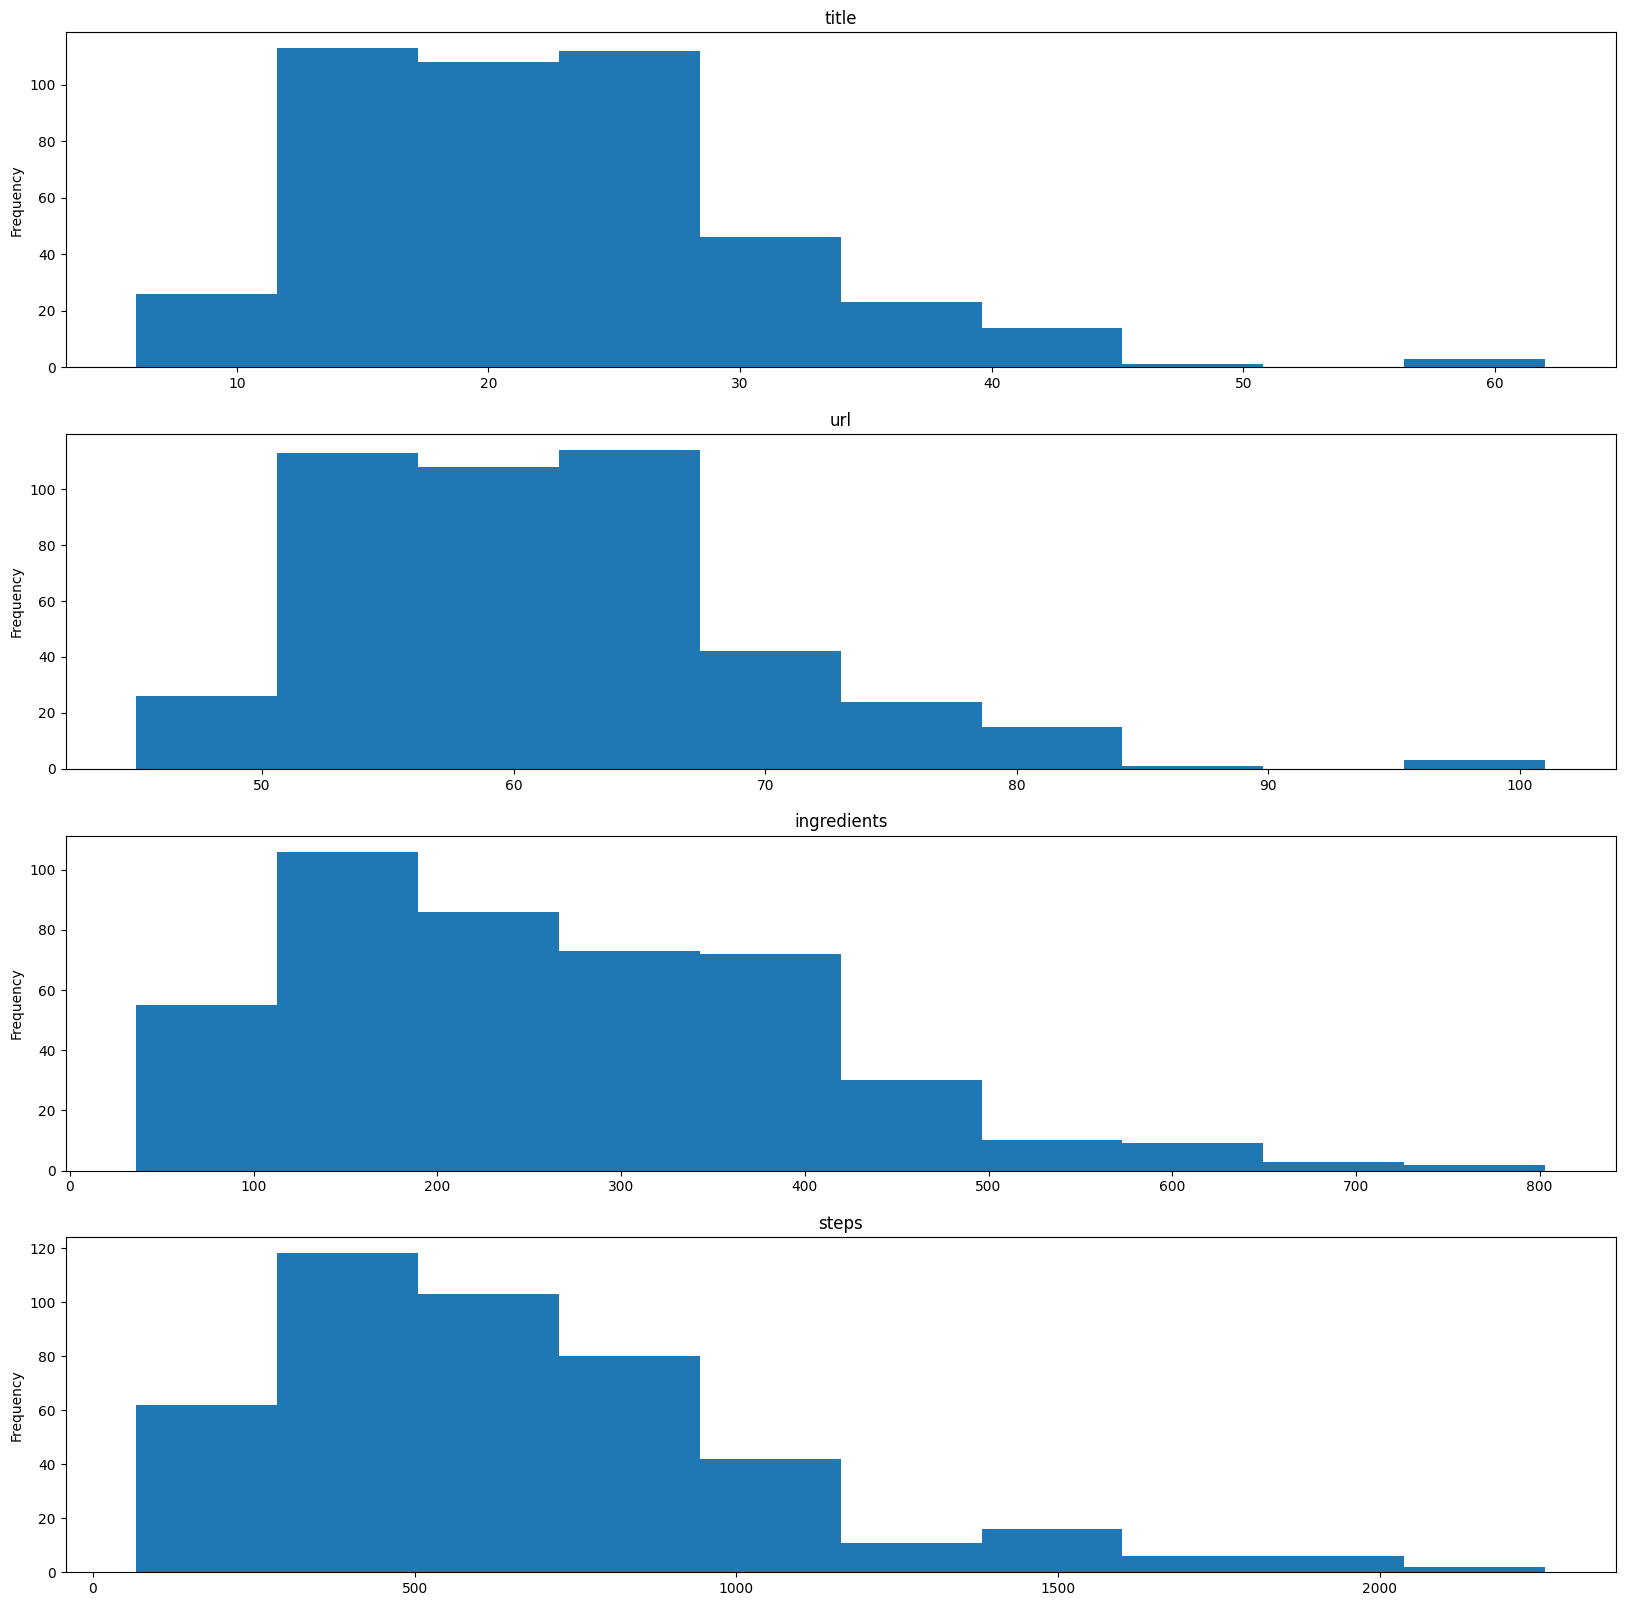

In [145]:
my_colombian.utils_text.plot_length_text()

In [27]:
my_colombian.ingredients = my_colombian.ingredients.str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")

C:\Users\froro\AppData\Local\Temp\ipykernel_17392\1347263670.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  my_colombian.ingredients = my_colombian.ingredients.str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")
C:\Users\froro\AppData\Local\Temp\ipykernel_17392\1347263670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_colombian.ingredients = my_colombian.ingredients.str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")


In [28]:
my_colombian.steps = my_colombian.steps.str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")

C:\Users\froro\AppData\Local\Temp\ipykernel_17392\1254849419.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  my_colombian.steps = my_colombian.steps.str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")
C:\Users\froro\AppData\Local\Temp\ipykernel_17392\1254849419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_colombian.steps = my_colombian.steps.str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")


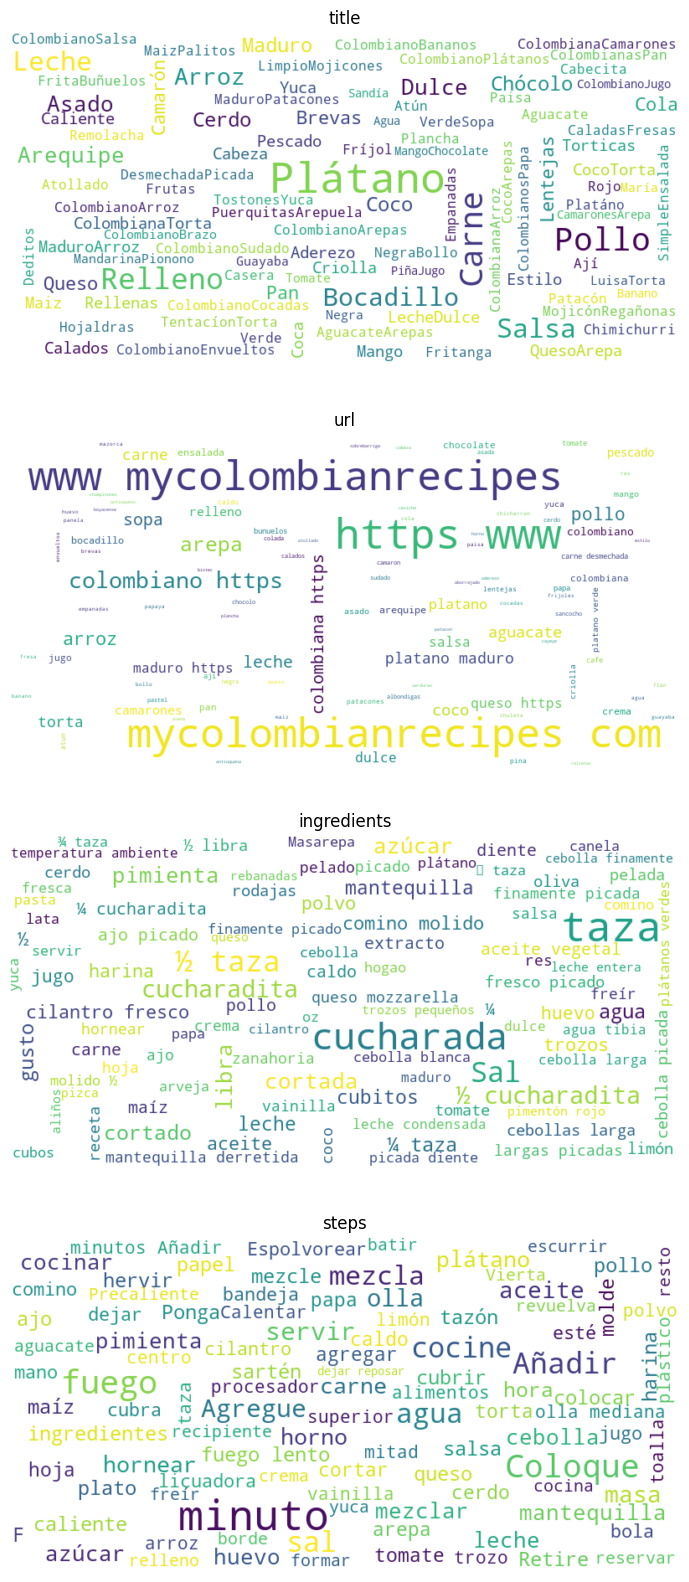

In [146]:
my_colombian.utils_text.plot_word_cloud()

In [147]:
my_colombian["uuid"] = my_colombian.apply(lambda x: uuid.uuid1(), axis=1)

my_colombian

,title,url,ingredients,steps,uuid
0,Arepas de Queso,https://www.mycolombianrecipes.com/es/arepas-d...,1 taza de harina de arepa blanca o amarilla\r\...,"Combine la harina de maíz, agua caliente, el q...",86af61e4-e16a-11ed-9591-a96d6180cd25
1,Sudado de Pollo,https://www.mycolombianrecipes.com/es/sudado-d...,8 muslos de pollo sin la piel\r\n1 cucharada d...,"En una olla grande, caliente el aceite vegetal...",86af61e5-e16a-11ed-abef-a96d6180cd25
2,Sancocho Trifásico,https://www.mycolombianrecipes.com/es/sancocho...,1 taza de cebolla picada\r\n1 pimientón rojo f...,"Coloque la cebolla, el pimientón, el ajo y el ...",86af61e6-e16a-11ed-bcf5-a96d6180cd25
3,Sudado de Posta o Muchacho,https://www.mycolombianrecipes.com/es/sudado-d...,"1 posta o muchacho de 3 a 4 libras, cortada en...","En una olla grande ponga la carne, el caldo, ...",86af61e7-e16a-11ed-8914-a96d6180cd25
4,Sopa de Lentejas Colombiana,https://www.mycolombianrecipes.com/es/sopa-de-...,1 cucharadita de aceite vegetal\r\n1 taza de c...,Cocinar el chorizo en el aceite en una olla gr...,86af71bc-e16a-11ed-b130-a96d6180cd25
...,...,...,...,...,...
441,Vinagreta de Aguacate,https://www.mycolombianrecipes.com/es/vinagret...,2 aguacates maduros pequeños\r\nJugo de1 limón...,Cortar cada aguacate por la mitad y retire la ...,86afd8b4-e16a-11ed-aa75-a96d6180cd25
442,Ají de Uchuvas,https://www.mycolombianrecipes.com/es/aji-de-u...,1 taza de uchuvas\r\n1 cucharada de azúcar\r\n...,Coloque las uchuvas con el azúcar y ¼ taza de ...,86afd8b5-e16a-11ed-bbea-a96d6180cd25
443,Dulce de Uchuvas,https://www.mycolombianrecipes.com/es/dulce-de...,1 taza de grosellas o uchuvas lavadas\r\n⅓ taz...,"En una olla pequeña a fuego medio, agregar el ...",86afd8b6-e16a-11ed-807a-a96d6180cd25
444,Ají de Maní,https://www.mycolombianrecipes.com/es/aji-de-m...,2 cebollas largas cortadas en trozos pequeños\...,"Calentar el aceite en una sartén, añadir la ce...",86afd8b7-e16a-11ed-9bf1-a96d6180cd25


## Nestle

In [148]:
nestle = datasets/"Nestle"
csv = nestle.glob("**/*.csv")
nestle = pd.concat(map(pd.read_csv, csv))
nestle.head()

,url,title,ingredients,steps
0,https://www.recetasnestle.com.co/recetas/ensal...,Ensalada de atún con papa,1 libra de papa sabanera sin piel y cortada...,1. En una olla con suficiente agua coloca...
1,https://www.recetasnestle.com.co/recetas/ensal...,Ensalada mexicana con cochinita pibil,1 libra de pierna de cerdo (500 g) 1 s...,"1. Precalienta el horno a 180°C/ 360°F, 1..."
2,https://www.recetasnestle.com.co/recetas/ensal...,"Ensalada con chips de berenjena al horno, y qu...",1 cucharada de aceite (14 g) 1 berenje...,"1. Precalienta el horno a 180°C/360°F, 10..."
3,https://www.recetasnestle.com.co/recetas/ensal...,"Ensalada de pollo a la mandarina, aguacate y m...",2 tazas de jugo de mandarina (500 ml) ...,1. Precalienta el horno a 180°C/360°F 10 ...
4,https://www.recetasnestle.com.co/recetas/ensal...,Ensalada de ahuyama confitada con almíbar de c...,1 cucharadita de jengibre fresco rallado (5...,"1. En una olla pon el agua, la citronela,..."


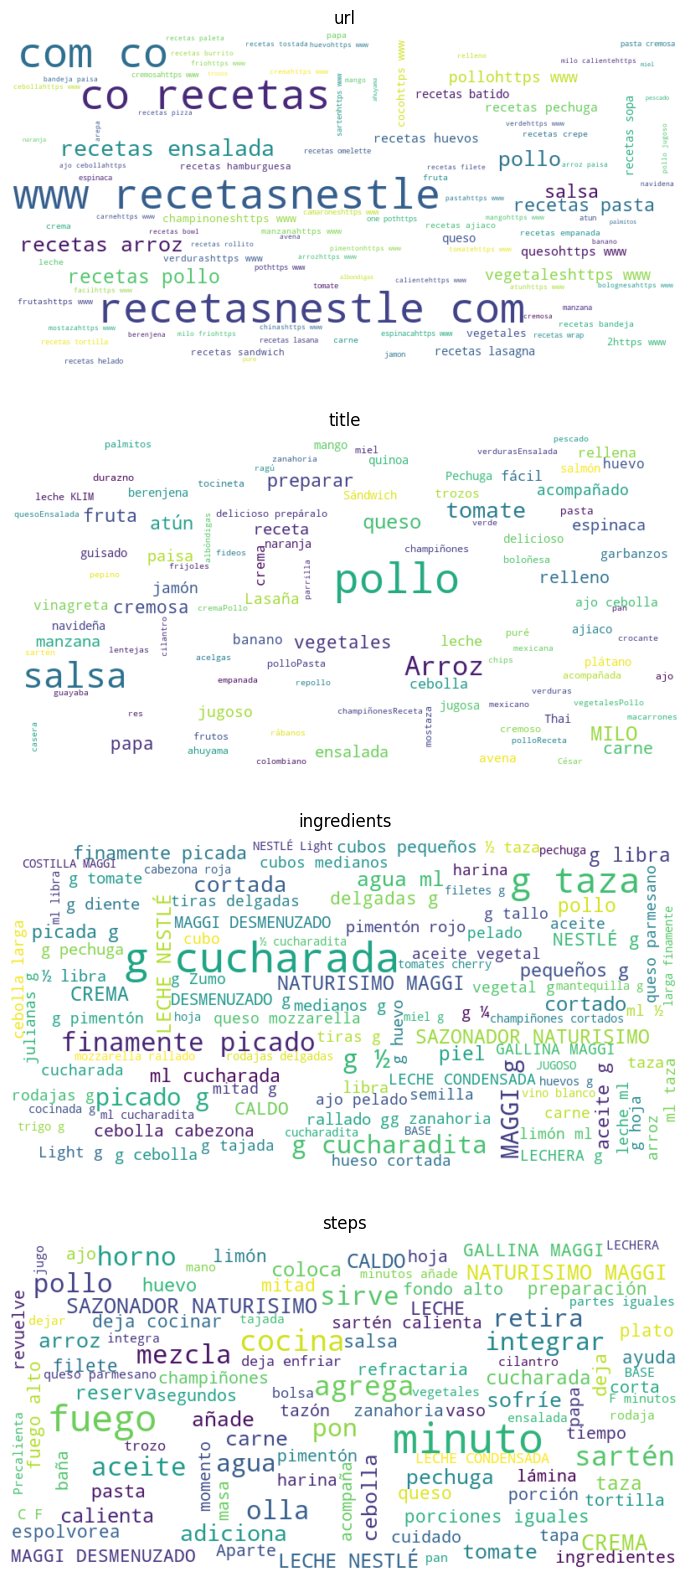

In [149]:
nestle.utils_text.plot_word_cloud()

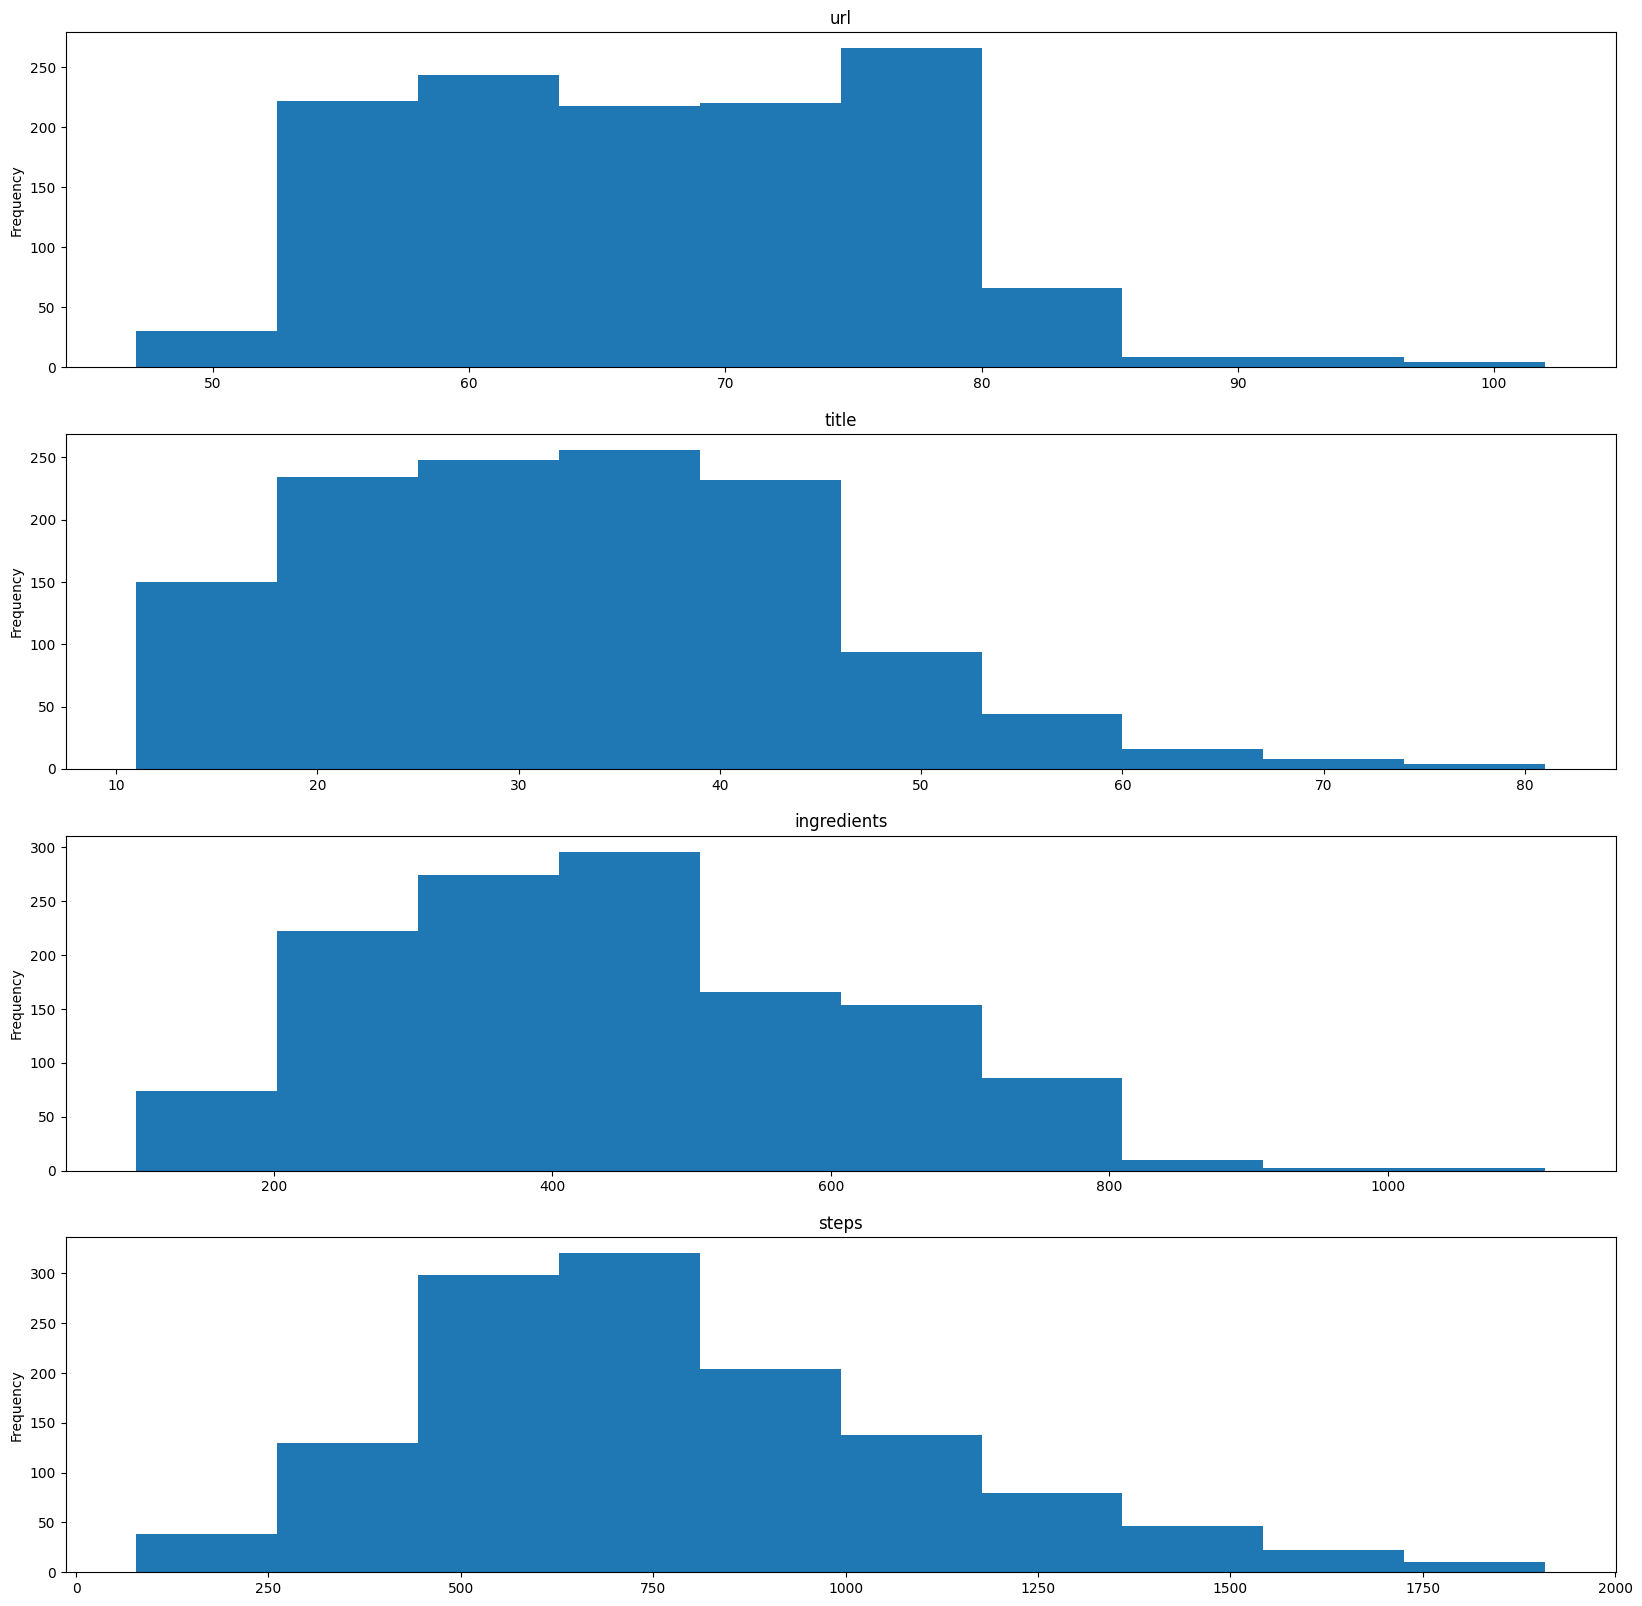

In [44]:
nestle.utils_text.plot_length_text()

In [150]:
nestle.uidd = nestle.apply(lambda x: uuid.uuid4(), axis=1)
nestle

C:\Users\froro\AppData\Local\Temp\ipykernel_17392\1767669200.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  nestle.uidd = nestle.apply(lambda x: uuid.uuid4(), axis=1)


,url,title,ingredients,steps
0,https://www.recetasnestle.com.co/recetas/ensal...,Ensalada de atún con papa,1 libra de papa sabanera sin piel y cortada...,1. En una olla con suficiente agua coloca...
1,https://www.recetasnestle.com.co/recetas/ensal...,Ensalada mexicana con cochinita pibil,1 libra de pierna de cerdo (500 g) 1 s...,"1. Precalienta el horno a 180°C/ 360°F, 1..."
2,https://www.recetasnestle.com.co/recetas/ensal...,"Ensalada con chips de berenjena al horno, y qu...",1 cucharada de aceite (14 g) 1 berenje...,"1. Precalienta el horno a 180°C/360°F, 10..."
3,https://www.recetasnestle.com.co/recetas/ensal...,"Ensalada de pollo a la mandarina, aguacate y m...",2 tazas de jugo de mandarina (500 ml) ...,1. Precalienta el horno a 180°C/360°F 10 ...
4,https://www.recetasnestle.com.co/recetas/ensal...,Ensalada de ahuyama confitada con almíbar de c...,1 cucharadita de jengibre fresco rallado (5...,"1. En una olla pon el agua, la citronela,..."
...,...,...,...,...
638,https://www.recetasnestle.com.co/recetas/sopa-...,Sopa vietnamita de carne con fideos de arroz,1 sobre de CALDO CON COSTILLA MAGGI® DESMEN...,"1. En una olla de fondo alto, añade el ag..."
639,https://www.recetasnestle.com.co/recetas/filet...,Filete de salmón con puré de papa,2 taza de agua (500 ml) 1 libra de pap...,1. En una olla mediana agrega las tazas d...
640,https://www.recetasnestle.com.co/recetas/arroz...,¿Cómo preparar Arroz Atollado?,2 cucharadas aceite de canola (28 g) 1...,1. En una olla de fondo alto calienta el ...
641,https://www.recetasnestle.com.co/recetas/arroz...,Arroz con lentejas y cebollas caramelizadas,3 cucharadas de aceite (42 g) 1 diente...,"1. En una olla amplia a fuego medio, cali..."


## Others

In [151]:
others = datasets/"others"
others_df = pd.read_csv(others/"elgurmet.csv")
others_df.head()

,url,ingrediants,steps,title,uuid
0,https://elgourmet.com/recetas/niguiri-de-tamag...,Huevo 5 Unidades Azúcar 1 ¾ Cucharadas ...,"En una sartén de tamago, colocar un poco de ac...",Niguiri de Tamagoyaki,41351b02-5325-472b-9eea-a4d3d5562886
1,https://elgourmet.com/recetas/sashimi-de-lengu...,Filetes de lenguado 2 Unidades Lima 1 Unida...,Retirar la piel y cortar laminas en un ángulo ...,Sahime de lenguado,e187e250-219f-4695-856f-e67045924f8a
2,https://elgourmet.com/recetas/alfajores-de-cho...,MASA Extracto de malta 40 g Almidón de maíz...,Batir la manteca pomada con el azúcar hasta bl...,Alfajores De Chocolate,cf868cc7-a33e-4be5-b492-5c8be6079cb7
3,https://elgourmet.com/recetas/alfajores-de-mai...,Manteca 200 g Yemas 10 unidades Coco rall...,Batir la manteca blanda con el azúcar impalpab...,Alfajores De Maicena Tradicional,6e213728-160d-4844-a97e-2b1b423cfac4
4,https://elgourmet.com/recetas/semifrio-de-fram...,Yogur griego 375 g Agua de rosas 10 g Azú...,PROCEDIMIENTO Hidratar la grenetina con el agu...,Semifrío de Frambuesa y Yogur,47fb7150-0086-41cc-bd2a-cad58741e456


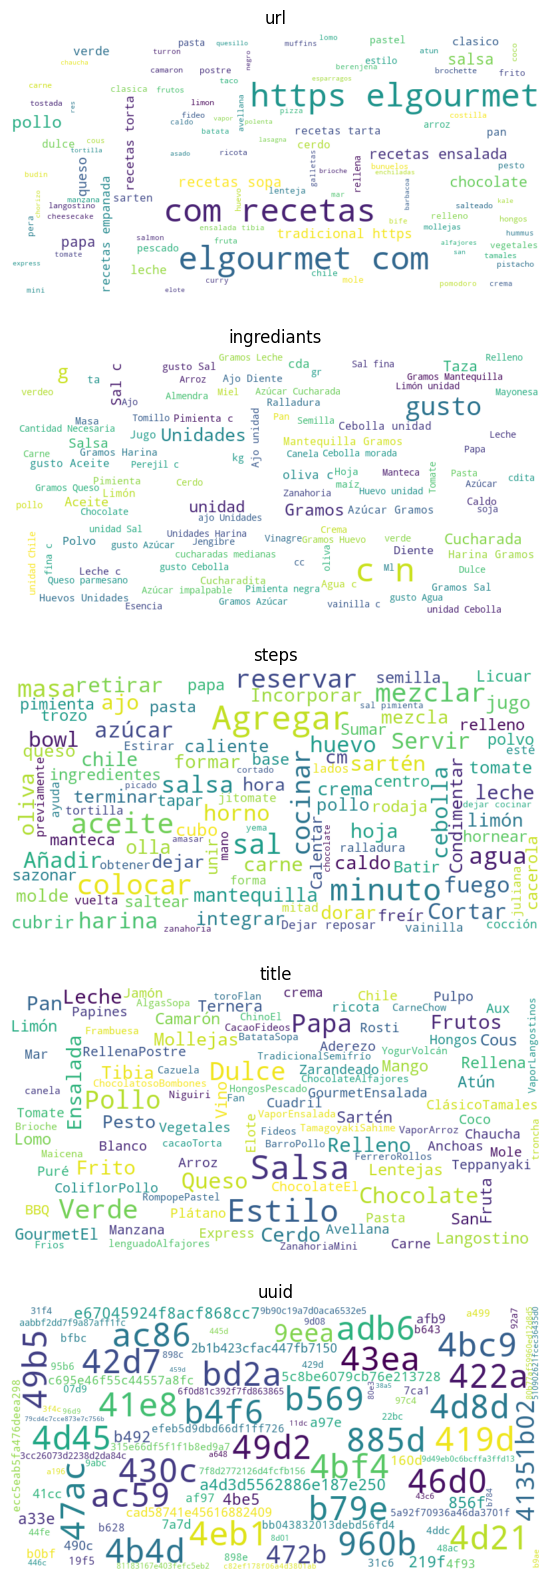

In [152]:
others_df.utils_text.plot_word_cloud()

## Recetas de Pais

In [153]:
pais_dataset = datasets/"Recetas"
pais_df = pd.concat(map(pd.read_csv, pais_dataset.glob("*.csv")))
pais_df.head()

,url,title,date,ingredients,steps
0,https://www.recetas.com/rollitos-de-pavo-relle...,Rollitos de pavo rellenos,NaN,6 finas rebanadas de pavo 130 gr. de ternera p...,Rollitos de pavo rellenos\n\nPoner en un tazó...
1,https://www.recetas.com/tiramisu-a-la-naranja....,Tiramisú a la naranja,NaN,400 gr. de mascarpone 200 gr. de vainillas 200...,Tiramisú a la naranja\n\nRomper los huevos se...
2,https://www.recetas.com/mayonesa-de-naranja.html,Mayonesa de naranja,NaN,NaN,"Mayonesa de naranja\n\nLavar la naranja, rall..."
3,https://www.recetas.com/pastel-ganache-de-choc...,Pastel ganache de chocolate,NaN,Para el pastel : 300 gr. de chocolate amargo a...,Pastel ganache de chocolate\n\nDerretir la ma...
4,https://www.recetas.com/pizza-con-tomates-cher...,"Pizza con tomates cherry, burrata y cebolla mo...",NaN,1 bollo de masa para pizza de 280 gr. Albahaca...,"Pizza con tomates cherry, burrata y cebolla m..."


In [154]:
pais_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6787 entries, 0 to 23
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   url          6787 non-null   object 
 1   title        6787 non-null   object 
 2   date         0 non-null      float64
 3   ingredients  5597 non-null   object 
 4   steps        6551 non-null   object 
dtypes: float64(1), object(4)
memory usage: 318.1+ KB


In [155]:
pais_df.dropna(inplace=True, subset=["ingredients"])

C:\Users\froro\AppData\Local\Temp\ipykernel_17392\3223170977.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  pais_df.ingredients = pais_df.ingredients.str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")
C:\Users\froro\AppData\Local\Temp\ipykernel_17392\3223170977.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  pais_df.steps = pais_df.steps.str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")


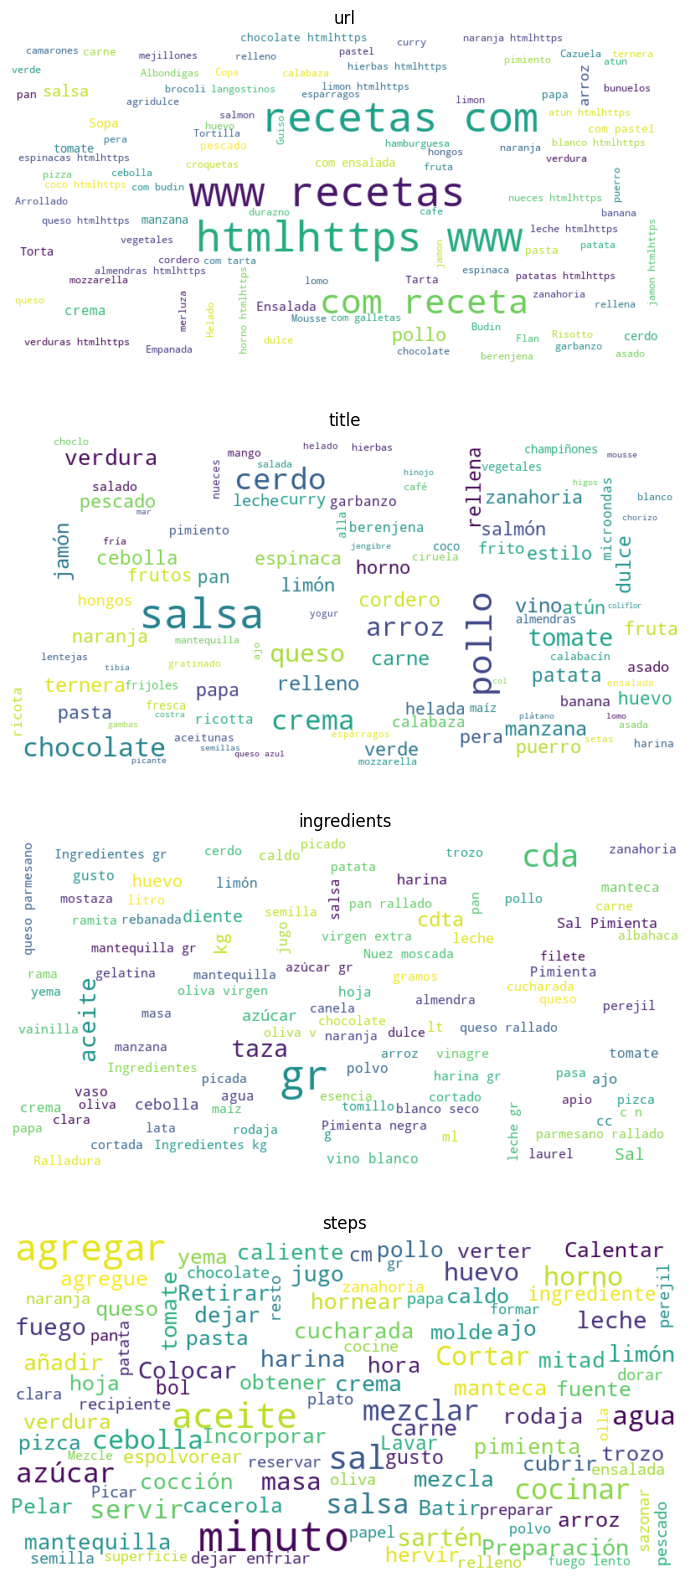

In [156]:
pais_df.ingredients = pais_df.ingredients.str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")
pais_df.steps = pais_df.steps.str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")
pais_df.utils_text.plot_word_cloud()

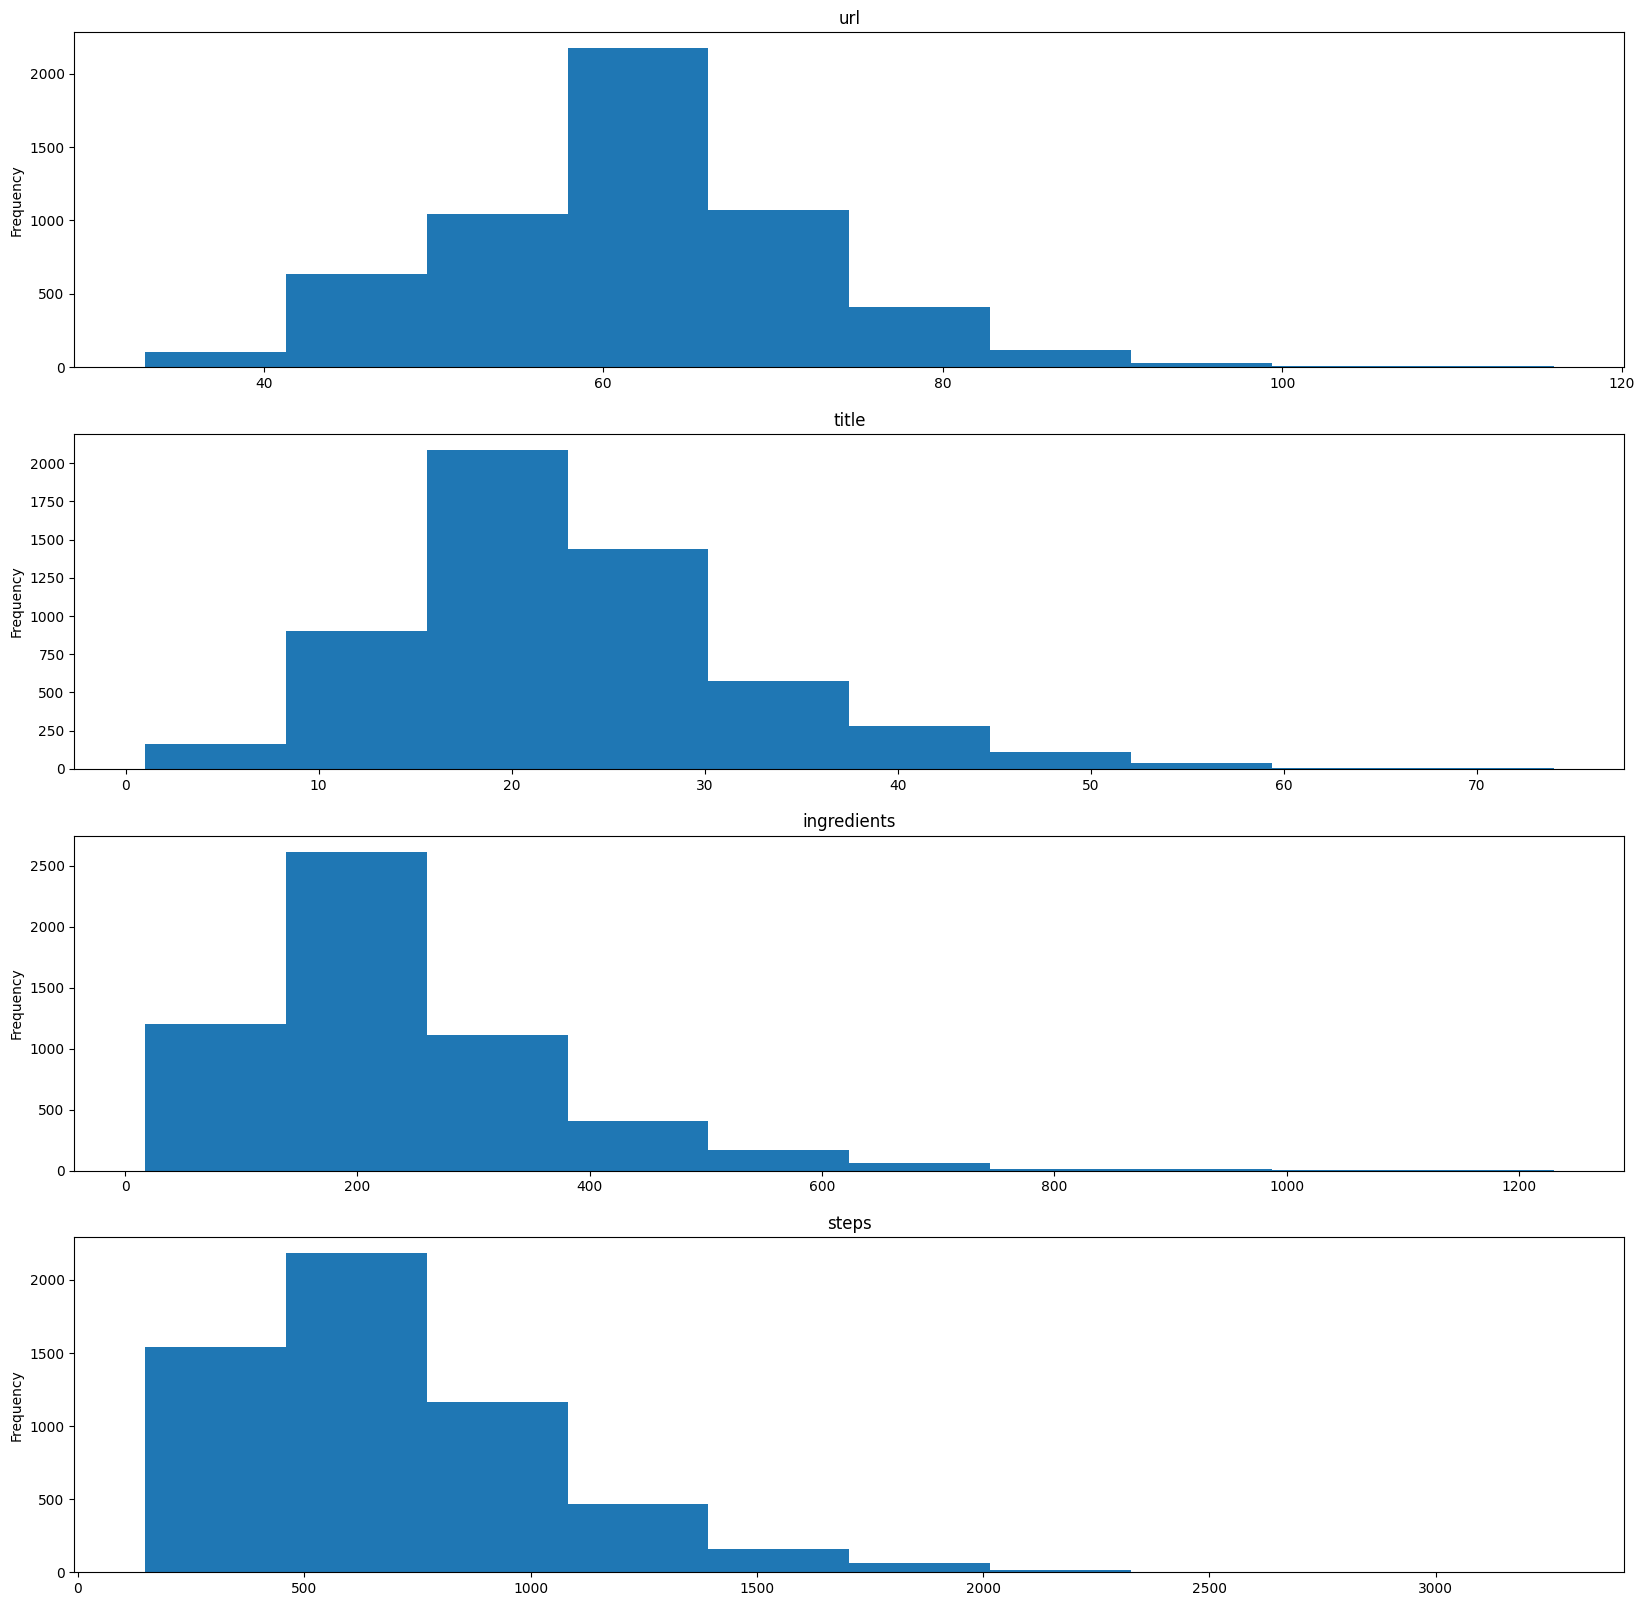

In [157]:
pais_df.utils_text.plot_length_text()

In [1]:
pais_df["uuid"] = pais_df.apply(lambda x: uuid.uuid4(), axis=1)

NameError: name 'pais_df' is not defined

In [159]:
pais_df = pais_df[["uuid", "url", "ingredients", "steps"]]
pais_df.head()

,uuid,url,ingredients,steps
0,b64c13c9-83dc-440e-85c6-6abc63c36d13,https://www.recetas.com/rollitos-de-pavo-relle...,6 finas rebanadas de pavo 130 gr. de ternera p...,Rollitos de pavo rellenos Poner en un tazón g...
1,ffdab49e-eb0d-4a6b-9dad-54a2a4e11013,https://www.recetas.com/tiramisu-a-la-naranja....,400 gr. de mascarpone 200 gr. de vainillas 200...,Tiramisú a la naranja Romper los huevos separ...
3,e4ac5f62-e060-4f56-9f35-103c364676b4,https://www.recetas.com/pastel-ganache-de-choc...,Para el pastel : 300 gr. de chocolate amargo a...,Pastel ganache de chocolate Derretir la mante...
4,4c487193-4767-49c0-9786-fc726c3fe3db,https://www.recetas.com/pizza-con-tomates-cher...,1 bollo de masa para pizza de 280 gr. Albahaca...,"Pizza con tomates cherry, burrata y cebolla m..."
5,f236ec90-6eda-44da-8680-2f4208ce3b45,https://www.recetas.com/brocoli-horneado-cruji...,300 gr. de brócoli 50 gr. de aceite de oliva e...,Brócoli horneado crujiente Precalentar el hor...


## Recetas1

In [160]:
dataset_val = (datasets/"Recetas1").glob("**/*.csv")
data_df = pd.concat(map(pd.read_csv, dataset_val))


In [161]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21122 entries, 0 to 49
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         21122 non-null  object 
 1   intro         12970 non-null  object 
 2   order         21122 non-null  object 
 3   votes         15608 non-null  object 
 4   comensales    13954 non-null  object 
 5   duración      13952 non-null  object 
 6   para          11944 non-null  object 
 7   dificultad    15488 non-null  object 
 8   coste         0 non-null      float64
 9   types         14620 non-null  object 
 10  ingredientes  20909 non-null  object 
 11  url           21122 non-null  object 
dtypes: float64(1), object(11)
memory usage: 2.1+ MB


In [162]:
data_df.dropna(inplace=True, subset=["ingredientes"])

In [163]:
import ast
data_df["ingredientes"] = data_df["ingredientes"].apply(lambda x: ast.literal_eval(x)).apply(lambda x: " ".join(x)).str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")
data_df["order"] = data_df["order"].apply(lambda x: ast.literal_eval(x)).apply(lambda x: " ".join(x)).str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")

C:\Users\froro\AppData\Local\Temp\ipykernel_17392\3317945053.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data_df["ingredientes"] = data_df["ingredientes"].apply(lambda x: ast.literal_eval(x)).apply(lambda x: " ".join(x)).str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")
C:\Users\froro\AppData\Local\Temp\ipykernel_17392\3317945053.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data_df["order"] = data_df["order"].apply(lambda x: ast.literal_eval(x)).apply(lambda x: " ".join(x)).str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")


In [164]:
data_df["uuid"] = data_df.apply(lambda x: uuid.uuid4(), axis=1)

In [165]:
data_df = data_df[["uuid", "url", "ingredientes", "order", "title"]]
data_df.rename(columns={"ingredientes": "ingredients", "order": "steps"}, inplace=True)

In [167]:
data_df.ingredients = data_df.ingredients.str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")

C:\Users\froro\AppData\Local\Temp\ipykernel_17392\2742007453.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_df.ingredients = data_df.ingredients.str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")


In [168]:
data_df.steps = data_df.steps.str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")

C:\Users\froro\AppData\Local\Temp\ipykernel_17392\2699328045.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_df.steps = data_df.steps.str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")


In [170]:
df = pd.concat([my_colombian, nestle, pais_df, data_df])

In [171]:
df

,title,url,ingredients,steps,uuid
0,Arepas de Queso,https://www.mycolombianrecipes.com/es/arepas-d...,1 taza de harina de arepa blanca o amarilla\r\...,"Combine la harina de maíz, agua caliente, el q...",86af61e4-e16a-11ed-9591-a96d6180cd25
1,Sudado de Pollo,https://www.mycolombianrecipes.com/es/sudado-d...,8 muslos de pollo sin la piel\r\n1 cucharada d...,"En una olla grande, caliente el aceite vegetal...",86af61e5-e16a-11ed-abef-a96d6180cd25
2,Sancocho Trifásico,https://www.mycolombianrecipes.com/es/sancocho...,1 taza de cebolla picada\r\n1 pimientón rojo f...,"Coloque la cebolla, el pimientón, el ajo y el ...",86af61e6-e16a-11ed-bcf5-a96d6180cd25
3,Sudado de Posta o Muchacho,https://www.mycolombianrecipes.com/es/sudado-d...,"1 posta o muchacho de 3 a 4 libras, cortada en...","En una olla grande ponga la carne, el caldo, ...",86af61e7-e16a-11ed-8914-a96d6180cd25
4,Sopa de Lentejas Colombiana,https://www.mycolombianrecipes.com/es/sopa-de-...,1 cucharadita de aceite vegetal\r\n1 taza de c...,Cocinar el chorizo en el aceite en una olla gr...,86af71bc-e16a-11ed-b130-a96d6180cd25
...,...,...,...,...,...
45,Berenjenas rellenas de carne picada y bechamel...,https://www.recetasgratis.net/receta-de-berenj...,4 Berenjenas 2 Zanahorias 1 Cebolla 1 diente d...,1 Empezaremos a preparar estas berenjenas rell...,b0a6454b-a023-44af-a189-92dee8948490
46,Puré de patatas con queso y huevo,https://www.recetasgratis.net/receta-de-pure-d...,2 Patatas 2 Huevos 100 gramos de Parmesano 2 l...,"1 Cocemos las patatas y, una vez listas, las p...",6e52da68-9496-47de-b85c-7be7fd0b6ac2
47,Rollitos de calabacín rellenos de jamón y queso,https://www.recetasgratis.net/receta-de-rollit...,½ Calabacín 100 gramos de Jamón cocido 100 gra...,1 Lo primero que debemos hacer es lavar bien e...,22412360-37fe-47de-9401-d3f1e95fe4e7
48,Calabacín relleno de quinoa,https://www.recetasgratis.net/receta-de-calaba...,4 Calabacines 1 Cebolla 1 Pimiento verde 1 Pim...,1 Lo primero que tenemos que hacer para elabor...,eedfabb6-d14f-46e4-a34f-dc07b9015636


In [172]:
df.shape

(28238, 5)

In [173]:
df

,title,url,ingredients,steps,uuid
0,Arepas de Queso,https://www.mycolombianrecipes.com/es/arepas-d...,1 taza de harina de arepa blanca o amarilla\r\...,"Combine la harina de maíz, agua caliente, el q...",86af61e4-e16a-11ed-9591-a96d6180cd25
1,Sudado de Pollo,https://www.mycolombianrecipes.com/es/sudado-d...,8 muslos de pollo sin la piel\r\n1 cucharada d...,"En una olla grande, caliente el aceite vegetal...",86af61e5-e16a-11ed-abef-a96d6180cd25
2,Sancocho Trifásico,https://www.mycolombianrecipes.com/es/sancocho...,1 taza de cebolla picada\r\n1 pimientón rojo f...,"Coloque la cebolla, el pimientón, el ajo y el ...",86af61e6-e16a-11ed-bcf5-a96d6180cd25
3,Sudado de Posta o Muchacho,https://www.mycolombianrecipes.com/es/sudado-d...,"1 posta o muchacho de 3 a 4 libras, cortada en...","En una olla grande ponga la carne, el caldo, ...",86af61e7-e16a-11ed-8914-a96d6180cd25
4,Sopa de Lentejas Colombiana,https://www.mycolombianrecipes.com/es/sopa-de-...,1 cucharadita de aceite vegetal\r\n1 taza de c...,Cocinar el chorizo en el aceite en una olla gr...,86af71bc-e16a-11ed-b130-a96d6180cd25
...,...,...,...,...,...
45,Berenjenas rellenas de carne picada y bechamel...,https://www.recetasgratis.net/receta-de-berenj...,4 Berenjenas 2 Zanahorias 1 Cebolla 1 diente d...,1 Empezaremos a preparar estas berenjenas rell...,b0a6454b-a023-44af-a189-92dee8948490
46,Puré de patatas con queso y huevo,https://www.recetasgratis.net/receta-de-pure-d...,2 Patatas 2 Huevos 100 gramos de Parmesano 2 l...,"1 Cocemos las patatas y, una vez listas, las p...",6e52da68-9496-47de-b85c-7be7fd0b6ac2
47,Rollitos de calabacín rellenos de jamón y queso,https://www.recetasgratis.net/receta-de-rollit...,½ Calabacín 100 gramos de Jamón cocido 100 gra...,1 Lo primero que debemos hacer es lavar bien e...,22412360-37fe-47de-9401-d3f1e95fe4e7
48,Calabacín relleno de quinoa,https://www.recetasgratis.net/receta-de-calaba...,4 Calabacines 1 Cebolla 1 Pimiento verde 1 Pim...,1 Lo primero que tenemos que hacer para elabor...,eedfabb6-d14f-46e4-a34f-dc07b9015636


In [134]:
df.to_csv(datasets/"dataset.csv", index=False)